# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [33]:
import pandas as pd

# Load your data
df = pd.read_csv("PY2022_KCC_PUF_Data_File.csv")

# Show the index range
df.index

# Show the shape (rows, columns)
df.shape

# Print in a readable sentence
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 79 rows and 17 columns.


In [34]:
df.index

RangeIndex(start=0, stop=79, step=1)

In [35]:
df.shape

(79, 17)

In [36]:
print( "There are 5320 rows and 54 columns.")

There are 5320 rows and 54 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [37]:
# Count unique values in each column
unique_counts = df.nunique().sort_values(ascending=False)
unique_counts

KCC_ID                        79
PROS_ESRD_ACTV_QRTR_CNT       79
ALIGN_BENE_CNT                79
ALIGN_ESRD_ELGBLE_MNTH_CNT    79
ALIGN_DUALS_MNTH_CNT          79
PROS_CKD_ACTV_QRTR_CNT        79
ALIGN_RACE_1_BENE_CNT         78
ALGN_FEMALE_BENE_CNT          78
ALIGN_CKD_ELGBLE_MNTH_CNT     78
ALIGN_TRX_ELGBLE_MNTH_CNT     72
ALIGN_RACE_2_BENE_CNT         68
ALIGN_RACE_5_BENE_CNT         47
ALIGN_RACE_4_BENE_CNT         42
ALIGN_RACE_3_BENE_CNT         36
ALIGN_RACE_0_BENE_CNT         33
ALIGN_RACE_6_BENE_CNT         14
PY                             1
dtype: int64

In [38]:
df.head()

,KCC_ID,PY,ALIGN_BENE_CNT,ALIGN_CKD_ELGBLE_MNTH_CNT,ALIGN_ESRD_ELGBLE_MNTH_CNT,ALIGN_TRX_ELGBLE_MNTH_CNT,PROS_CKD_ACTV_QRTR_CNT,PROS_ESRD_ACTV_QRTR_CNT,ALGN_FEMALE_BENE_CNT,ALIGN_DUALS_MNTH_CNT,ALIGN_RACE_0_BENE_CNT,ALIGN_RACE_1_BENE_CNT,ALIGN_RACE_2_BENE_CNT,ALIGN_RACE_3_BENE_CNT,ALIGN_RACE_4_BENE_CNT,ALIGN_RACE_5_BENE_CNT,ALIGN_RACE_6_BENE_CNT
0,C0002,PY1,803,3740,3913,100,1336,1357,381,4732,Suppressed,322,42,66,249,94,Suppressed
1,K0183,PY1,123,791,579,0,274,187,60,518,Suppressed,95,Suppressed,Suppressed,Suppressed,15,Suppressed
2,C0041,PY1,1274,7911,4905,150,2791,1692,616,1880,23,1000,233,11,Suppressed,Suppressed,0
3,K0102,PY1,438,2747,1471,75,952,527,190,831,16,312,82,11,Suppressed,12,Suppressed
4,C0037,PY1,1877,10900,7732,171,3844,2630,948,3423,18,1347,284,25,28,78,97


In [39]:
counts = {}
# Calculating the unique values for each column
for column in df:
 values = df[column].unique()
count = len(values)
counts[column] = count

# Finding the columns with highest values
highest_count = ("",0)
next_highest_count = ("",0)

for column, i in counts.items():
    if i > highest_count[1]:
        next_highest_count = highest_count
        highest_count = (column, i)
    elif i > next_highest_count[2]:
        next_highest_count = (column, i)


# Results
print(f"most diversity column")
print(f"The column with the highest count is '{highest_count[0]}' with {highest_count[1]} unique values.")
print(f"The column with the next highest count is '{next_highest_count[0]}' with {next_highest_count[1]} unique values.")

most diversity column
The column with the highest count is 'ALIGN_RACE_6_BENE_CNT' with 14 unique values.
The column with the next highest count is '' with 0 unique values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [40]:
# Identify columns where every row has the same value
redundant_cols = [col for col in df.columns if df[col].nunique() == 1]
redundant_cols

['PY']

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

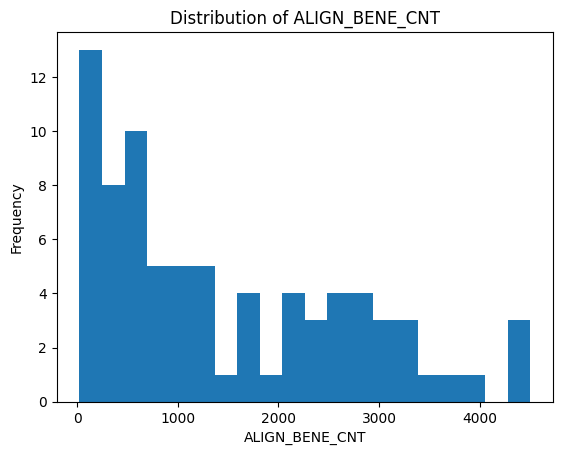

In [42]:
import matplotlib.pyplot as plt

plt.hist(df["ALIGN_BENE_CNT"].dropna(), bins=20)
plt.xlabel("ALIGN_BENE_CNT")
plt.ylabel("Frequency")
plt.title("Distribution of ALIGN_BENE_CNT")
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [44]:
# Correlation check
df[["ALIGN_BENE_CNT", "ALIGN_DUALS_MNTH_CNT"]].corr()

,ALIGN_BENE_CNT,ALIGN_DUALS_MNTH_CNT
ALIGN_BENE_CNT,1.000000,0.770108
ALIGN_DUALS_MNTH_CNT,0.770108,1.000000


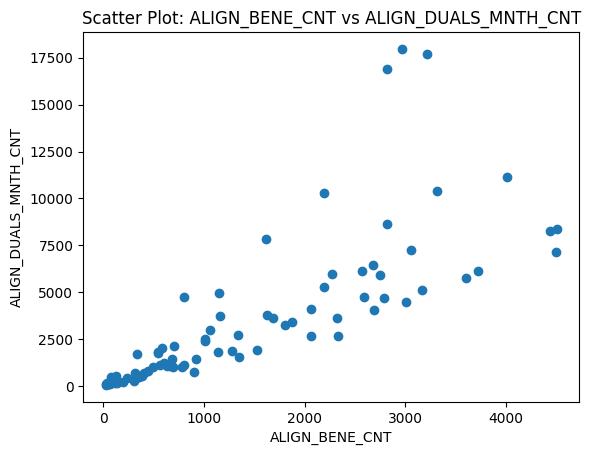

In [45]:
plt.scatter(df["ALIGN_BENE_CNT"], df["ALIGN_DUALS_MNTH_CNT"])
plt.xlabel("ALIGN_BENE_CNT")
plt.ylabel("ALIGN_DUALS_MNTH_CNT")
plt.title("Scatter Plot: ALIGN_BENE_CNT vs ALIGN_DUALS_MNTH_CNT")
plt.show()



---



## Submitting Your Work

Submit your work as usual.